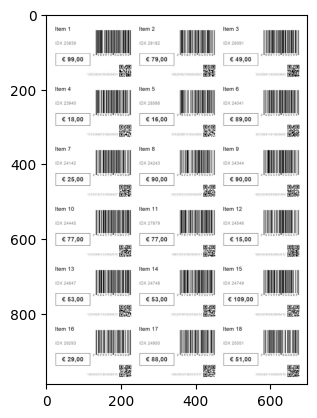

In [52]:
import cv2
from matplotlib.pyplot import imshow
import numpy as np

bgr_img = cv2.imread(r"D:\Learning\CV\Krishnaik_live\Assignments\2\data\assignment-2.jpg")
imshow(bgr_img)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
imshow(gray_img, cmap="gray")

True

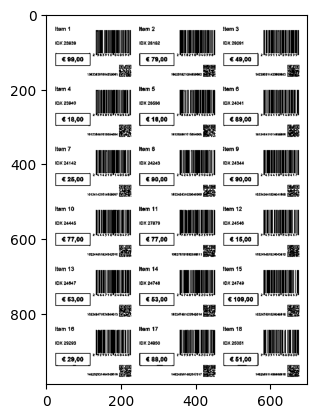

In [53]:
threshold = 240
processed_gray_img = gray_img.copy()
processed_gray_img = np.where(processed_gray_img > threshold, 255, 0)
imshow(processed_gray_img, cmap="gray")

cv2.imwrite(r"D:\Learning\CV\Krishnaik_live\Assignments\2\data\processed.jpg",
            processed_gray_img)

In [54]:
height, width = processed_gray_img.shape
height, width

(990, 700)

In [55]:
# np.unique(processed_gray_img)

In [56]:
# processed_gray_img[0, :] != 255

In [57]:
row_idices = []
set_of_rows = []
get_index = False
for i in range(height):
    output = np.all(processed_gray_img[i, :] == 255)
    if output:
        get_index = True
        set_of_rows.append(i)
    else:
        if get_index:
            row_idices.append(set_of_rows)
            set_of_rows = []
            get_index = False

In [58]:
final_row_index = []
for all_row_index in row_idices:
    print(all_row_index)
    medain_val = np.median(all_row_index, )
    final_row_index.append(int(medain_val))

print(final_row_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]
[329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354]
[489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514]
[650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675]
[810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836]
[16, 180, 341, 501, 662, 823]


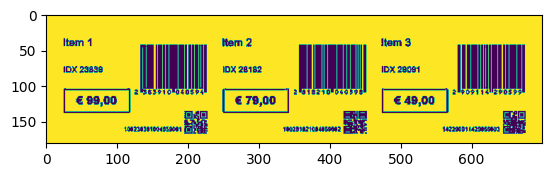

In [59]:
imshow(processed_gray_img[0:181, :])

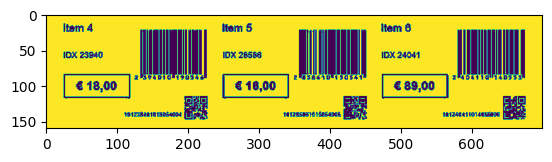

In [60]:
imshow(processed_gray_img[181:341, :])

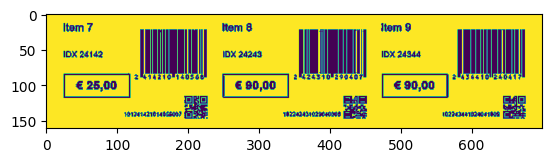

In [61]:
imshow(processed_gray_img[341:502, :])

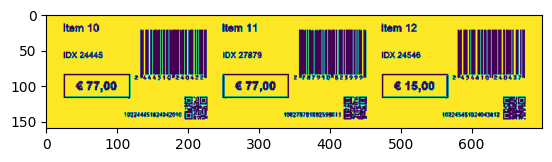

In [62]:
imshow(processed_gray_img[502:662, :])

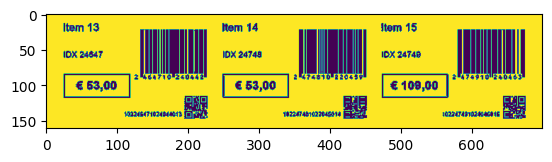

In [63]:
imshow(processed_gray_img[662:823, :])

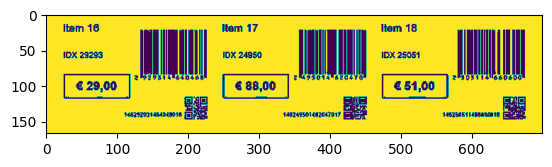

In [64]:
imshow(processed_gray_img[823:, :])

In [65]:
width

700

In [66]:
col_idices = []
set_of_cols = []
get_index = False
for i in range(width):
    output = np.all(processed_gray_img[:, i] == 255)
    
    if output:
        get_index = True
        set_of_cols.append(i)
    else:
        if get_index:
            col_idices.append(set_of_cols)
            set_of_cols = []
            get_index = False


final_col_index = []
for all_col_index in col_idices:
    medain_val = np.median(all_col_index, )
    final_col_index.append(int(medain_val))

print(final_col_index)

[12, 238, 462]


In [67]:
print(f"Column index of Pixels to be cut: {final_col_index[1:]}")
print(f"Row index of Pixels to be cut: {final_row_index[1:]}")

# Intitial 1 boundaries are not required because the image boundary is sufficient

Column index of Pixels to be cut: [238, 462]
Row index of Pixels to be cut: [180, 341, 501, 662, 823]


In [68]:
width

700

In [69]:
final_col_index

[12, 238, 462]

In [70]:
# add last width and height for the col and row index for final indexing
final_col_index.append(width)
final_row_index.append(height)

print(f"Final Column index of Pixels to be cut: {final_col_index[1:]}")
print(f"Final Row index of Pixels to be cut: {final_row_index[1:]}")


Final Column index of Pixels to be cut: [238, 462, 700]
Final Row index of Pixels to be cut: [180, 341, 501, 662, 823, 990]


In [ ]:
import os

In [77]:
bgr_img = cv2.imread(r"D:\Learning\CV\Krishnaik_live\Assignments\2\data\assignment-2.jpg")

In [78]:
prev_row_index = 0
prev_col_index = 0
i = 1
for row_index in final_row_index[1:]:
    img_row = bgr_img[prev_row_index: row_index, :, :]
    prev_row_index = row_index
    for col_index in final_col_index[1:]:
        new_image = img_row[: , prev_col_index: col_index, :]
        prev_col_index = col_index
        cv2.imwrite(r"D:\Learning\CV\Krishnaik_live\Assignments\2\data\output\image_{}.jpg".format(i),
                    new_image)
        i += 1
    prev_col_index = 0
    


In [79]:
import os
import cv2

In [ ]:
def read_image_bgr(img_path: str):
    if not os.path.exists(img_path):
        raise FileNotFoundError(img_path)
    img = cv2.imread(img_path)
    return img


def get_median_values_from_list(list_indicies: int) -> list[int]:
    final_indecies = []
    for all_index in list_indicies:
        medain_val = np.median(all_index)
        final_indecies.append(int(medain_val))

    return final_indecies

def get_column_index(width: int) -> list[int]: 
    col_idices = []
    set_of_cols = []
    get_index = False
    for i in range(width):
        output = np.all(processed_gray_img[:, i] == 255)
        
        if output:
            get_index = True
            set_of_cols.append(i)
        else:
            if get_index:
                col_idices.append(set_of_cols)
                set_of_cols = []
                get_index = False

    return get_median_values_from_list(col_idices)


def get_row_index(height: int) -> list[int]:
    row_idices = []
    set_of_rows = []
    get_index = False
    for i in range(height):
        output = np.all(processed_gray_img[i, :] == 255)
        if output:
            get_index = True
            set_of_rows.append(i)
        else:
            if get_index:
                row_idices.append(set_of_rows)
                set_of_rows = []
                get_index = False\
                
    return get_median_values_from_list(row_idices)


def cut_image(image, row_indicies: list[int], column_indicies:list[int]):
    prev_row_index = 0
    prev_col_index = 0
    cut_images = []
    for row_index in row_indicies:
        img_row = image[prev_row_index: row_index, :, :]
        prev_row_index = row_index
        for col_index in column_indicies[1:]:
            new_image = img_row[: , prev_col_index: col_index, :]
            cut_images.append(new_image)
            prev_col_index = col_index

        prev_col_index = 0

    return cut_images